<a href="https://colab.research.google.com/github/niteshydv01/ML-LAB-102217260/blob/main/ML_assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##(Gaussian Naïve Bayes Classifier) Implement Gaussian Naïve Bayes Classifier on the Iris dataset from sklearn.datasets using
        (i) Step-by-step implementation        (ii) In-built function


#(i) Step-by-step implementation

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Function to calculate conditional probabilities (mean and std for Gaussian Naïve Bayes)
def calculate_conditional_probabilities(X_train, y_train):
    """
    Calculate conditional probabilities (mean and std) for each feature given the class label.
    """
    conditional_probs = {}
    for class_label in set(y_train):
        X_class = X_train[y_train == class_label]
        mean = X_class.mean(axis=0)
        std = X_class.std(axis=0)
        conditional_probs[class_label] = (mean, std)
    return conditional_probs

# Step 3: Function to calculate prior probabilities for each class
def calculate_prior_probs(y_train):
    """
    Calculate prior probabilities for each class.
    """
    prior_probs = {}
    total_samples = len(y_train)
    class_counts = {label: np.sum(y_train == label) for label in np.unique(y_train)}
    for label, count in class_counts.items():
        prior_probs[label] = count / total_samples
    return prior_probs

# Step 4: Gaussian likelihood calculation and prediction function
def gaussian_probability(x, mean, std):
    """
    Calculate the Gaussian probability density function for a given feature.
    """
    exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

def predict(X_new, conditional_probs, prior_probs):
    """
    Make predictions for a new data point using Gaussian Naïve Bayes.
    """
    max_posterior_prob = float("-inf")
    predicted_class = None
    for class_label, (mean, std) in conditional_probs.items():
        # Calculate the likelihood (log of Gaussian distribution) for each feature
        log_likelihood = np.sum(np.log(gaussian_probability(X_new, mean, std)))
        # Posterior = log(prior) + log(likelihood)
        posterior_prob = np.log(prior_probs[class_label]) + log_likelihood

        # Check if the current class has the highest posterior probability
        if posterior_prob > max_posterior_prob:
            max_posterior_prob = posterior_prob
            predicted_class = class_label
    return predicted_class

# Step 5: Training phase - Calculate conditional and prior probabilities
conditional_probs = calculate_conditional_probabilities(X_train, y_train)
prior_probs = calculate_prior_probs(y_train)

# Step 6: Predict on test set
y_pred = np.array([predict(X_test[i], conditional_probs, prior_probs) for i in range(X_test.shape[0])])

# Step 7: Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


#(ii) In-built function





In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

byes = GaussianNB()

byes.fit(X_train, y_train)

y_pred = byes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


#Explore about GridSearchCV toot in scikit-learn. This is a tool that is often used for tuning hyperparameters of machine learning models. Use this tool to find the best value of K for K-NN Classifier using any dataset

The best value of K is: 1
Accuracy with the best K: 1.00


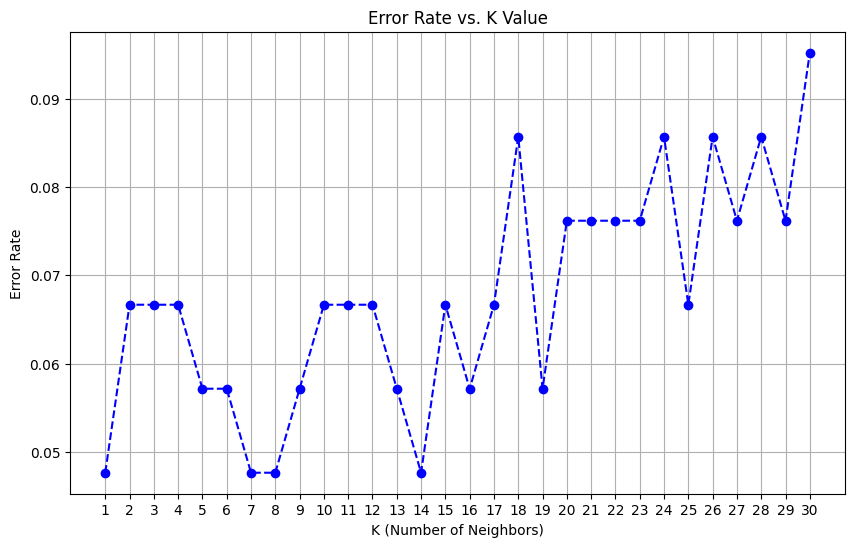

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of K is: {best_k}")

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the best K: {accuracy:.2f}")

mean_test_scores = grid_search.cv_results_['mean_test_score']
error_rates = 1 - mean_test_scores

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], error_rates, marker='o', linestyle='--', color='b')
plt.title('Error Rate vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1, 31, 1))
plt.grid(True)
plt.show()


The best value of K is: 13
Accuracy with the best K: 0.93


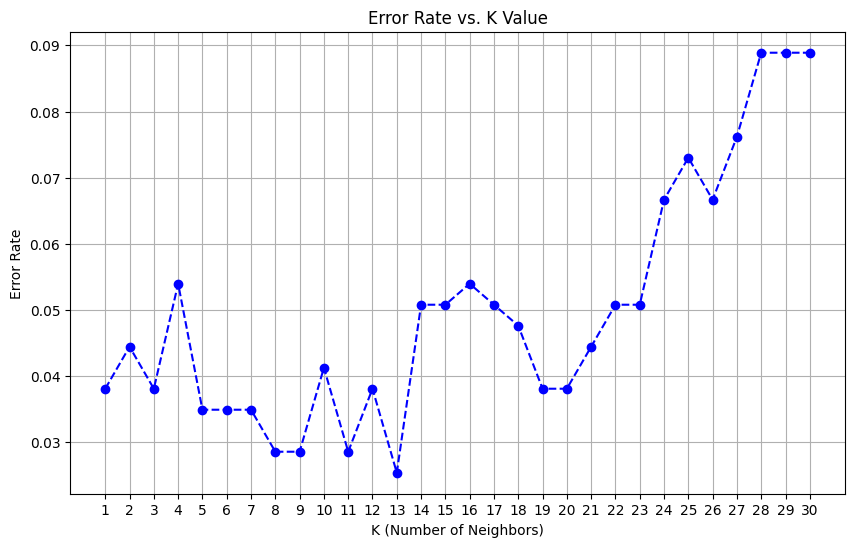

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Parameter grid (K values to test)
param_grid = {'n_neighbors': np.arange(1, 31)}

# Repeated Stratified K-Fold Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# GridSearchCV with 5-fold cross-validation repeated 3 times
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of K is: {best_k}")

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the best K: {accuracy:.2f}")

# Plot error rate vs K
mean_test_scores = grid_search.cv_results_['mean_test_score']
error_rates = 1 - mean_test_scores

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], error_rates, marker='o', linestyle='--', color='b')
plt.title('Error Rate vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1, 31, 1))
plt.grid(True)
plt.show()
